In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import xesmf as xe
import cartopy.crs as ccrs

In [2]:
path='/scratch/jgaigala/'
file='asr15km.anl.2D.200001.mon.nc'
var='SNOALB'
#var='T2M'

In [3]:
ds=xr.open_dataset(path+file)
ds

<xarray.Dataset>
Dimensions:   (Time: 1, lev: 4, x: 720, y: 720)
Coordinates:
  * Time      (Time) datetime64[ns] 2000-01-16T11:00:00
    XLAT      (y, x) float32 ...
    XLONG     (y, x) float32 ...
  * lev       (lev) float64 1.0 2.0 3.0 4.0
Dimensions without coordinates: x, y
Data variables: (12/30)
    DateTime  (Time) int32 ...
    ALBBCK    (Time, y, x) float32 ...
    ALBEDO    (Time, y, x) float32 ...
    ALBSI     (Time, y, x) float32 ...
    ICEDEPTH  (Time, y, x) float32 ...
    ISLTYP    (Time, y, x) int32 ...
    ...        ...
    TSLB      (Time, lev, y, x) float32 ...
    U10E      (Time, y, x) float32 ...
    U10M      (Time, y, x) float32 ...
    V10E      (Time, y, x) float32 ...
    V10M      (Time, y, x) float32 ...
    VEGFRA    (Time, y, x) float32 ...
Attributes: (12/53)
    CDI:                             Climate Data Interface version 1.5.4 (ht...
    Conventions:                     CF-1.4
    TITLE:                           Arctic System Reanalysis - The Ohio Stat...
    WEST-EAST_GRID_DIMENSION:        721
    SOUTH-NORTH_GRID_DIMENSION:      721
    BOTTOM-TOP_GRID_DIMENSION:       34
    ...                              ...
    IFNDALBSI:                       1
    IFNDICEDEPTH:                    1
    IFNDSNOWSI:                      1
    CDO:                             Climate Data Operators version 1.5.4 (ht...
    history:                         Wed Mar 15 21:08:02 2017: ./ncks -C -O -...
    NCO:                             4.2.1

In [4]:
ds[var].values

array([[[0.08 , 0.08 , 0.08 , ..., 0.08 , 0.08 , 0.08 ],
        [0.08 , 0.08 , 0.08 , ..., 0.08 , 0.08 , 0.08 ],
        [0.08 , 0.08 , 0.08 , ..., 0.08 , 0.08 , 0.08 ],
        ...,
        [0.809, 0.809, 0.809, ..., 0.08 , 0.08 , 0.08 ],
        [0.809, 0.809, 0.809, ..., 0.08 , 0.08 , 0.08 ],
        [0.809, 0.809, 0.809, ..., 0.08 , 0.08 , 0.08 ]]], dtype=float32)

Text(0, 0.5, 'lat')

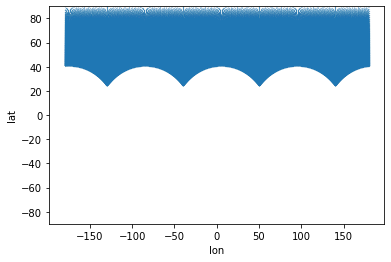

In [5]:
plt.scatter(ds['XLONG'], ds['XLAT'], s=0.01)  # plot grid locations
plt.ylim([-90, 90])
plt.xlabel('lon')
plt.ylabel('lat')

In [6]:
ds = ds.rename({'XLONG': 'lon', 'XLAT': 'lat'})

In [7]:
new_lat=np.arange(-90,90.5,0.5)
new_lon=np.arange(0,360.1,0.1)

ds_out = xr.Dataset({'lat': (['lat'], new_lat),
                    'lon': (['lon'], new_lon)
                    })
ds_out

<xarray.Dataset>
Dimensions:  (lat: 361, lon: 3601)
Coordinates:
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.6 359.7 359.8 359.9 360.0
Data variables:
    *empty*

In [8]:
#xe.Regridder?

In [9]:
regridder = xe.Regridder(ds, ds_out,'bilinear')
dr_out = regridder(ds[var]).to_dataset(name=var)
dr_out

Overwrite existing file: bilinear_720x720_361x3601.nc 
 You can set reuse_weights=True to save computing time.


/homes/nburls/.conda/envs/clim680/lib/python3.6/site-packages/xesmf/frontend.py:421: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


<xarray.Dataset>
Dimensions:  (Time: 1, lat: 361, lon: 3601)
Coordinates:
  * Time     (Time) datetime64[ns] 2000-01-16T11:00:00
  * lon      (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.6 359.7 359.8 359.9 360.0
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
Data variables:
    SNOALB   (Time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.7473 0.7473 0.7473

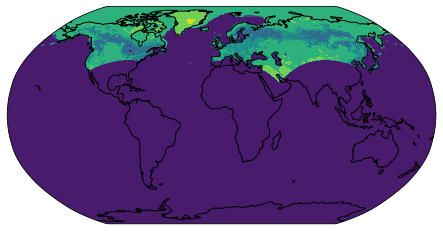

In [10]:
plt.figure(figsize=(12,4));
ax = plt.axes(projection=ccrs.Robinson())
ax.contourf(dr_out['lon'],dr_out['lat'],dr_out[var][0,:,:],transform=ccrs.PlateCarree())
ax.coastlines()

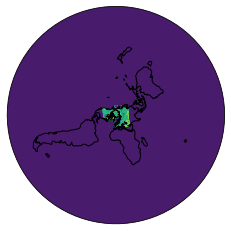

In [11]:
plt.figure(figsize=(12,4));
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
ax.contourf(dr_out['lon'],dr_out['lat'],dr_out[var][0,:,:],
            transform=ccrs.PlateCarree())
ax.coastlines()

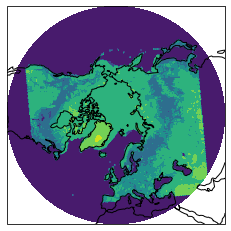

In [12]:
# Select arctic region
dr_arctic=dr_out.sel(lat=slice(30,90))
plt.figure(figsize=(12,4));
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
ax.contourf(dr_arctic['lon'],dr_arctic['lat'],dr_arctic[var][0,:,:],
            transform=ccrs.PlateCarree())
ax.coastlines()

**Regrid CESM Ocean Model (POP) output**

In [13]:
path='/homes/nburls/CAREER_PWC_shared/PlioMIP2/NCAR/'
file='b.e12.B1850.f09_g16.PMIP4-pliomip2.pop.h.TEMP.1100-1199.annavg.nc'
var='TEMP'

In [14]:
ds=xr.open_dataset(path+file)
ds

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 405, moc_comp: 3, moc_z: 61, nlat: 394, nlon: 320, time: 1, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * z_t                   (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m              (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                   (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top               (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot               (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * lat_aux_grid          (lat_aux_grid) float32 -84.83 -84.3 ... 89.48 90.0
  * moc_z                 (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                 (nlat, nlon) float64 ...
    ULAT                  (nlat, nlon) float64 ...
    TLONG                 (nlat, nlon) float64 ...
    TLAT                  (nlat, nlon) float64 ...
  * time                  (time) object 1150-01-15 10:00:00.000002
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables: (12/54)
    moc_components        (moc_comp) |S256 ...
    transport_components  (transport_comp) |S256 ...
    transport_regions     (transport_reg) |S256 ...
    dz                    (z_t) float32 ...
    dzw                   (z_w) float32 ...
    KMT                   (nlat, nlon) float64 ...
    ...                    ...
    salinity_factor       float64 ...
    sflux_factor          float64 ...
    nsurface_t            float64 ...
    nsurface_u            float64 ...
    time_bound            (time, d2) object ...
    TEMP                  (time, z_t, nlat, nlon) float32 ...
Attributes: (12/13)
    title:           b.e12.B1850.f09_g16.PIMP4-pliomip2.modMed
    history:         Mon Aug  3 14:01:40 2020: ncra b.e12.B1850.f09_g16.PIMP4...
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 46405 2013-04-26 05:24:34Z mlevy@ucar.edu $
    ...              ...
    start_time:      This dataset was created on 2019-10-15 at 16:15:19.7
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    5521375
    tavg_sum:        2678400.0
    tavg_sum_qflux:  2678400.0
    NCO:             netCDF Operators version 4.7.9 (Homepage = http://nco.sf...

In [15]:
ds = ds.rename({'TLONG': 'lon', 'TLAT': 'lat'})

In [16]:
new_lat=np.arange(-90,90.5,1)
new_lon=np.arange(0,360,1)

ds_out = xr.Dataset({'lat': (['lat'], new_lat),
                    'lon': (['lon'], new_lon)
                    })
ds_out

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360)
Coordinates:
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    *empty*

In [17]:
regridder = xe.Regridder(ds, ds_out,'nearest_s2d')
dr_out = regridder(ds[var]).to_dataset(name=var)
dr_out

Overwrite existing file: nearest_s2d_394x320_181x360.nc 
 You can set reuse_weights=True to save computing time.


/homes/nburls/.conda/envs/clim680/lib/python3.6/site-packages/xesmf/frontend.py:421: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 1, z_t: 60)
Coordinates:
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * time     (time) object 1150-01-15 10:00:00.000002
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    TEMP     (time, z_t, lat, lon) float64 nan nan nan nan ... nan nan nan nan

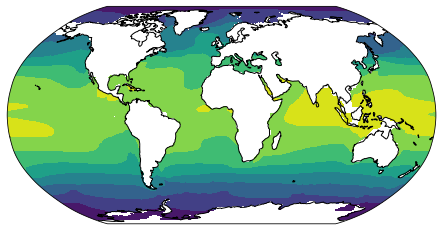

In [19]:
plt.figure(figsize=(12,4));
ax = plt.axes(projection=ccrs.Robinson())
ax.contourf(dr_out['lon'],dr_out['lat'],dr_out[var][0,0,:,:],transform=ccrs.PlateCarree())
ax.coastlines()